In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy import create_engine, inspect

### Temperature Analysis I

* Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?

* You may either use SQLAlchemy or pandas's `read_csv()` to perform this portion.

* Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.

* Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [13]:
query_june = """
        SELECT *
        FROM measurement
        WHERE strftime('%m',date) = '06'
        """
measurement_june = pd.read_sql(query_june, conn)
measurement_june

,id,station,date,prcp,tobs
0,134,USC00519397,2010-06-01,0.00,78.0
1,135,USC00519397,2010-06-02,0.01,76.0
2,136,USC00519397,2010-06-03,0.00,78.0
3,137,USC00519397,2010-06-04,0.00,76.0
4,138,USC00519397,2010-06-05,0.00,77.0
...,...,...,...,...,...
1695,19493,USC00516128,2017-06-26,0.02,79.0
1696,19494,USC00516128,2017-06-27,0.10,74.0
1697,19495,USC00516128,2017-06-28,0.02,74.0
1698,19496,USC00516128,2017-06-29,0.04,76.0


In [18]:
avg_jun = measurement_june.tobs.mean()
avg_jun

74.94411764705882

{'whiskers': [<matplotlib.lines.Line2D at 0x103e8c450>,
 'caps': [<matplotlib.lines.Line2D at 0x103e8cf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x103e7f7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x103e94990>],
 'fliers': [<matplotlib.lines.Line2D at 0x103e94e90>],
 'means': []}

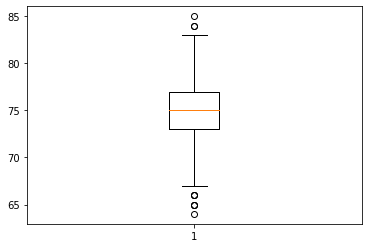

In [30]:
plt.boxplot(measurement_june.tobs)

In [14]:
query_dec = """
        SELECT *
        FROM measurement
        WHERE strftime('%m',date) = '12'
        """
measurement_dec = pd.read_sql(query_dec, conn)
measurement_dec

,id,station,date,prcp,tobs
0,306,USC00519397,2010-12-01,0.04,76.0
1,307,USC00519397,2010-12-03,0.00,74.0
2,308,USC00519397,2010-12-04,0.00,74.0
3,309,USC00519397,2010-12-06,0.00,64.0
4,310,USC00519397,2010-12-07,0.00,64.0
...,...,...,...,...,...
1512,19324,USC00516128,2016-12-27,0.14,71.0
1513,19325,USC00516128,2016-12-28,0.14,71.0
1514,19326,USC00516128,2016-12-29,1.03,69.0
1515,19327,USC00516128,2016-12-30,2.37,65.0


In [19]:
avg_dec = measurement_dec.tobs.mean()
avg_dec

71.04152933421226

{'whiskers': [<matplotlib.lines.Line2D at 0x1a19c9fe90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a19ca1990>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a19c9f250>],
 'medians': [<matplotlib.lines.Line2D at 0x1a19c9ff50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a19fd4910>],
 'means': []}

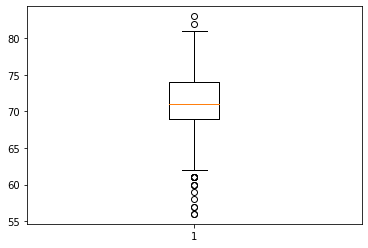

In [31]:
plt.boxplot(measurement_dec.tobs)

In [20]:
import scipy.stats as st

In [27]:
st.ttest_ind(measurement_june.tobs, measurement_dec.tobs)

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)